In [1]:
import sys
import numpy
import matplotlib
import skimage
import tensorflow as tf  
import cv2
from skimage.transform import resize, rescale 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from skimage import measure  
#import measure.compare_ssim as ssim
from skimage.metrics import structural_similarity as ssim
from matplotlib import pyplot as plt
import cv2
import numpy as np
import math
import os  
import matplotlib.pyplot as plt

In [15]:
srcnn_model = tf.keras.models.load_model('weights11.h5')

In [16]:
srcnn_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 1)]   0         
_________________________________________________________________
conv2d (Conv2D)              (None, None, None, 64)    1664      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, None, None, 32)    18464     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, None, None, 4)     1156      
_________________________________________________________________
tf.nn.depth_to_space (TFOpLa (None, None, None, 1)     0         
Total params: 21,284
Trainable params: 21,284
Non-trainable params: 0
_________________________________________________________________


In [47]:
upscale_factor=4
fullimg = cv2.imread("halfN1.jpg", 3)

width = fullimg.shape[0]
height = fullimg.shape[1]
img = fullimg

floatimg = img.astype(np.float32) / 255.0
imgYCbCr = cv2.cvtColor(floatimg, cv2.COLOR_BGR2YCrCb)
imgY = imgYCbCr[:, :, 0]
LR_input_ = imgY.reshape(1, imgY.shape[0], imgY.shape[1], 1)
Y = srcnn_model.predict([LR_input_])[0]
Cr = np.expand_dims(cv2.resize(imgYCbCr[:, :, 1], None, fx=upscale_factor, fy=upscale_factor, interpolation=cv2.INTER_CUBIC),
                    axis=2)
Cb = np.expand_dims(cv2.resize(imgYCbCr[:, :, 2], None, fx=upscale_factor, fy=upscale_factor, interpolation=cv2.INTER_CUBIC),
                    axis=2)
HR_image_YCrCb = np.concatenate((Y, Cr, Cb), axis=2)

HR_image = ((cv2.cvtColor(HR_image_YCrCb, cv2.COLOR_YCrCb2BGR)) * 255.0).clip(min=0, max=255)
HR_image = (HR_image).astype(np.uint8)

cv2.imwrite("./halfN1super.jpg", HR_image) # used to save an image to any storage device

True

Text(0.5, 1.0, ' Model ')

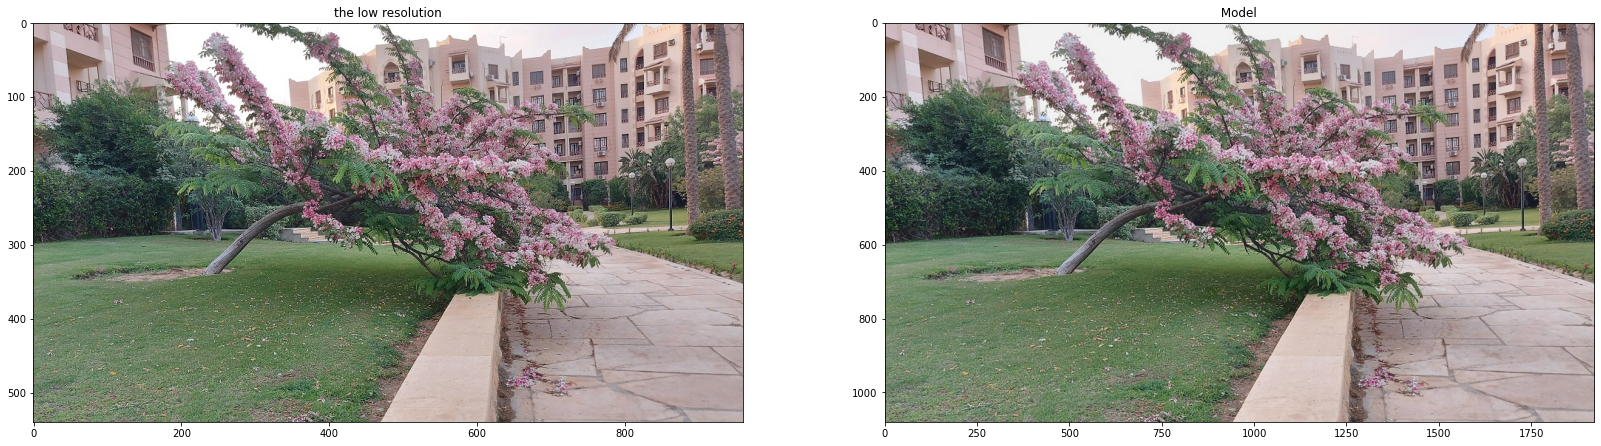

In [46]:
from matplotlib import pyplot as plt
plt.figure(figsize = (150, 150))
i = 1
ax = plt.subplot(10, 10, i)
plt.imshow(cv2.cvtColor(fullimg, cv2.COLOR_BGR2RGB))
plt.title("the low resolution")
i += 1
ax = plt.subplot(10, 10, i)
plt.imshow(cv2.cvtColor(HR_image, cv2.COLOR_BGR2RGB))
plt.title(" Model ")

In [38]:
fullimg = cv2.imread("halfN1.jpg", 3)

In [39]:
fullimg.shape

(540, 960, 3)